Machine Learning

![alt text](1_dqeortojRQDxvA_um2d8uA.png)

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
import warnings
from sklearn.preprocessing import StandardScaler
print('Libraries Imported')

Libraries Imported


In [118]:
data = {'Study_hrs':range(1,11),
       'Marks Obtained':[25,33,46,50,55,67,78,85,95,100]}

# data=pd.read_csv('D:\\Data Science\\Dataset\\data_for_lr.csv')
df = pd.DataFrame(data)

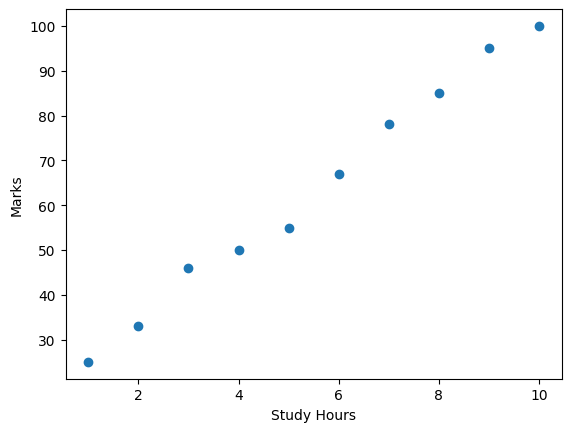

In [119]:
# For Regression model= either the data has positive or negative corelation
plt.scatter(df['Study_hrs'],df['Marks Obtained'])
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.show()

In [120]:
# y=mx+c
# m is the slope angle
# m is also known as w (weight)
# c is the intercept which is the value of y when the value of x is 0

# ML check the slope (angle of regression line) by increasing it and check error through 
# gradiant decent every time it increases the slope where it check the difference between 
# error point 1 and error point 2. when the error point 1 and error point 2 are equal,
# we got the best fit line

# when error point 1 and error point 2 in in the gradiant decent are equal that means 
# the function reached the global minima and that is the lowest value of the error for 
# that particular slope

# Error Point 1 and error point 2 are found using MAE, MSE, RMSE

#Does learning step influence the value of slope to check the regression line


![alt text](images.png)

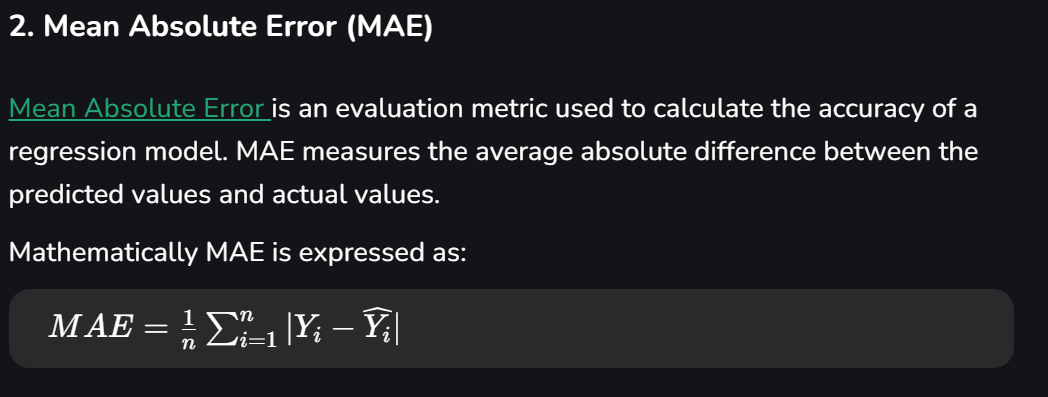

In [121]:
from sklearn.linear_model import LinearRegression


model=LinearRegression()

X=df[['Study_hrs']]
y=df['Marks Obtained']

model.fit(X,y)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [122]:
#let's predict marks here

m=model.coef_
c=model.intercept_

print(m,c)

[8.48484848] 16.733333333333327


In [123]:
stdy_hrs=[[0]]
marks=m*stdy_hrs+c

print('predicted marks',marks[0][0])

predicted marks 16.733333333333327


In [124]:
newone=[[float(input('Enter a study time'))]]

if newone>[[24]]:
    newone=[[24]]
elif newone<[[0]]:
    newone=[[0]]

warnings.filterwarnings('ignore')
ans=model.predict(newone)

marks = round(ans[0],2)

if marks>100:
    marks=100
elif marks<0:
    marks=0
print(f'Your Predicted marks is: {marks}')


Your Predicted marks is: 100


Multiple Linear Regression (Features: multiple x values)

In [125]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashydv/advertising-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Maddox\.cache\kagglehub\datasets\ashydv\advertising-dataset\versions\1


In [126]:
import os
os.listdir(path)

['advertising.csv']

In [127]:
file_path=path +'/'+os.listdir(path)[0]
file_path

'C:\\Users\\Maddox\\.cache\\kagglehub\\datasets\\ashydv\\advertising-dataset\\versions\\1/advertising.csv'

In [128]:
df_multi=pd.read_csv(file_path)
df_multi.sample(2)

,TV,Radio,Newspaper,Sales
156,93.9,43.5,50.5,15.3
102,280.2,10.1,21.4,19.8


In [129]:
df_multi.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [130]:
# Description:
# The advertising dataset captures the sales revenue generated with respect to advertisement
# costs across multiple channels like radio, tv, and newspapers.

# It is required to understand the impact of ad budgets on the overall sales.

In [131]:
# in multiplr linear regression we use the formula of the line

# y= m1*x1 + m2*x2 + m3*x3 + c

# y= w1*x1 + w2*x2 + w3*x3 + c

# x1 = TV
# x2 = Radio
# x3 = Sales

In [132]:
df_multi.sample(2)
X= df_multi.iloc[:,:-1]
y= df_multi.iloc[:,-1:]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.0323603111702533


In [140]:
import warnings
warnings.filterwarnings('ignore')

tv = 350
radio = 50
newspaper = 100
budget = [[tv,radio,newspaper]]

pred_sales = round(model.predict(budget)[0],2)

print('Predicted Sales:',pred_sales)

TypeError: type numpy.ndarray doesn't define __round__ method